## Initial Look at SafeGraph 2020 Polling Place Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Executive Summary
Latitude and longitude are included for all 3 types of polling place. Polling hours, start date, and end date are included as columns, though sometimes missing.

1) Traditional Polling Places
- All 50 states are covered
- Little missing data for our most important fields

2) Early Polling Places
- Only 11 states are present in this dataset

3) Dropoff Polling Places
- 35 states are present in this dataset
- Seem to be concentrated in the Northeast

### Load Data

In [3]:
polling = pd.read_csv('../Data/2020 Polling Data/polling_pk_master_post.csv')
early = pd.read_csv('../Data/2020 Polling Data/earlyVote_pk_master.csv')
dropoff = pd.read_csv('../Data/2020 Polling Data/dropoff_pk_master.csv')

### 1. Traditional Polling Places

In [18]:
polling.head()

,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id
0,0,223@8m4-tbj-bp9,NaN,"Tue, Nov 3: 7 am - 7 pm",21.305224,-157.857002,"[{'name': 'Voting Information Project', 'offic...",Honolulu Hale,530 South King Street,Honolulu,HI,96813,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN
1,1,@8m4-t4v-q4v,Invalid address,"Tue, Nov 3: 7 am - 7 pm",21.329854,-158.081865,"[{'name': 'Voting Information Project', 'offic...",Kapolei Hale,1000 Uluʻōhiʻa Street,Kapolei,HI,96707,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN
2,2,@8m4-793-jvz,Invalid address,"Tue, Nov 3: 7 am - 7 pm",21.090406,-157.017609,"[{'name': 'Voting Information Project', 'offic...",Mitchell Pauole Center Conference Room,90 Ainoa Street,Kaunakakai,HI,96748,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN
3,3,@bp5-ytd-j35,Invalid address,"Tue, Nov 3: 7 am - 7 pm",20.826513,-156.921143,"[{'name': 'Voting Information Project', 'offic...",Lanai Council District Office Lanai Community ...,Lanai Council District Office,Lanai City,HI,96763,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,8th Street,NaN,NaN
4,4,zzw-222@bp5-chr-8y9,NaN,"Tue, Nov 3: 7 am - 7 pm",20.900159,-156.491939,"[{'name': 'Voting Information Project', 'offic...",Velma McWayne Santos Community Center,395 Waena Street,Wailuku,HI,96793,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN


#### 1a) Which states are covered?

In [5]:
#Which states are covered?
print(len(polling['address.state'].unique()))
polling['address.state'].unique()

55


array(['HI', 'IL', 'MO', 'MO ', 'KS', 'WI', 'NV', 'MN', 'SD', 'IA', 'WA',
       'AK', 'AL', 'MS', 'TN', 'GA', 'KY', 'OH', 'IN', 'MI', 'TX',
       'Texas', 'CO', 'WY', 'ND', 'MT ', 'PA', 'FL', 'NH', 'AR', 'NY',
       'NC', 'Arkansas', nan, 'CA', 'CT', 'AZ', 'DC', 'DE', 'ID', 'UT',
       'VA', 'VT', 'WV', 'RI', 'MA', 'ME', 'NJ', 'SC', 'NM', 'MD', 'LA',
       'Louisiana', 'OK', 'NE'], dtype=object)

We have all 50 states represented here with 5 extra values. "MO", "Arkansas","Lousiana", and "Texas" are duplicates. The fifth value is "nan".

#### 1b) What % of each column is missing?

In [16]:
#What % of each column is missing?
polling.isna().sum()*100/len(polling.query_id)

query_id                 0.000000
placekey                 0.011757
error                   74.621250
pollingHours             0.115892
latitude                 1.545232
longitude                1.545232
sources                  0.000000
address.locationName     0.003359
address.line1            0.003359
address.city             0.010078
address.state            0.010078
address.zip              0.671840
notes                   78.454097
startDate               47.001915
endDate                 47.001915
address.line2           97.368067
address.line3           99.855554
id                      97.144681
dtype: float64

We see small percentages of missing data for our most important columns. Latitude and Longitude have about 1.5% missing values. Polling hours also has < 1% missing data which could benefit our analysis. Address location name, city, state, and zip code also have < 1% missing values.

#### 1c) What states have less polling place representation?

In [19]:
state_polling = polling.groupby('address.state').count()

Text(0, 0.5, 'State')

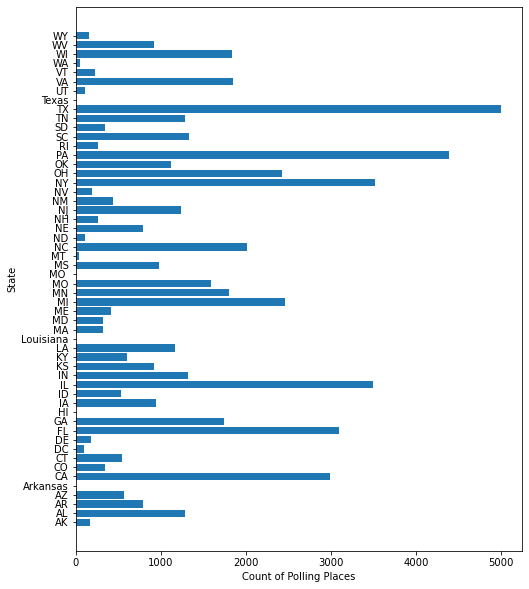

In [33]:
#Plot count of polling places
figure(figsize=(8, 10))
plt.barh(state_polling.index,state_polling.latitude)
plt.xlabel('Count of Polling Places')
plt.ylabel('State')

In [21]:
#The states with < 200 polling places
state_polling[state_polling.latitude < 200]

,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.zip,notes,startDate,endDate,address.line2,address.line3,id
address.state,,,,,,,,,,,,,,,,,
AK,172,172,58,172,172,172,172,172,172,172,156,0,0,0,7,0,0
Arkansas,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0
DC,94,94,0,94,94,94,94,94,94,94,94,0,94,94,0,0,0
DE,180,180,22,180,180,180,180,180,180,180,180,0,0,0,0,0,0
HI,8,8,3,8,8,8,8,8,8,8,8,8,8,8,1,0,0
Louisiana,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0
MO,11,11,8,11,9,9,11,11,11,11,11,0,11,11,0,0,0
MT,42,42,23,41,40,40,42,42,42,42,42,2,42,42,2,0,0
ND,105,105,39,105,105,105,105,105,105,105,105,0,105,105,1,1,0


#### 1d) Let's look at coverage on a map

In [30]:
import geopandas

geo_df = geopandas.GeoDataFrame(
    polling, geometry=geopandas.points_from_xy(polling.longitude, polling.latitude))

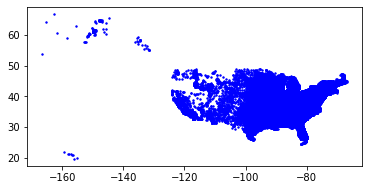

In [31]:
geo_df.plot(marker='o', color='blue', markersize=2)

### 2. Early Voting Polling Places

In [34]:
early.head()

,query_id,placekey,error,pollingHours,latitude,longitude,startDate,endDate,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,address.line2,name,voterServices
0,0,223@8m4-tbj-bp9,NaN,"Mon, Oct 26: 8:00 am - 4:30 pm\nTue, Oct 27: 8...",21.305224,-157.857002,10/20/2020,11/2/2020,"[{'name': 'Voting Information Project', 'offic...",Honolulu Hale,530 South King Street,Honolulu,HI,96813,Voter service centers provide accessible in-pe...,NaN,NaN,NaN
1,1,@8m4-t4v-q4v,Invalid address,"Mon, Oct 26: 8:00 am - 4:30 pm\nTue, Oct 27: 8...",21.329854,-158.081865,10/20/2020,11/2/2020,"[{'name': 'Voting Information Project', 'offic...",Kapolei Hale,1000 Uluʻōhiʻa Street,Kapolei,HI,96707,Voter service centers provide accessible in-pe...,NaN,NaN,NaN
2,2,@8m4-793-jvz,Invalid address,"Mon, Oct 26: 8:00 am - 4:30 pm\nTue, Oct 27: 8...",21.090406,-157.017609,10/20/2020,11/2/2020,"[{'name': 'Voting Information Project', 'offic...",Mitchell Pauole Center Conference Room,90 Ainoa Street,Kaunakakai,HI,96748,Voter service centers provide accessible in-pe...,NaN,NaN,NaN
3,3,@bp5-ytd-j35,Invalid address,"Mon, Oct 26: 8:00 am - 4:30 pm\nTue, Oct 27: 8...",20.826513,-156.921143,10/20/2020,11/2/2020,"[{'name': 'Voting Information Project', 'offic...",Lanai Council District Office Lanai Community ...,Lanai Council District Office,Lanai City,HI,96763,Voter service centers provide accessible in-pe...,8th Street,NaN,NaN
4,4,zzw-222@bp5-chr-8y9,NaN,"Mon, Oct 26: 8:00 am - 4:30 pm\nTue, Oct 27: 8...",20.900159,-156.491939,10/20/2020,11/2/2020,"[{'name': 'Voting Information Project', 'offic...",Velma McWayne Santos Community Center,395 Waena Street,Wailuku,HI,96793,Voter service centers provide accessible in-pe...,NaN,NaN,NaN


#### 2a) Which states are covered?

In [35]:
print(len(early['address.state'].unique()))
early['address.state'].unique()

11


array(['HI', 'IL', 'KY', 'IN', 'MI', 'TX', 'CO', 'ND', 'MN', 'AZ', 'NM'],
      dtype=object)

We only have 11 states represented in our early voting data and no duplicates.

#### 2b) What % of each column is missing?

In [37]:
#What % of each column is missing?
early.isna().sum()*100/len(early.query_id)

query_id                  0.000000
placekey                  0.000000
error                    82.721893
pollingHours             36.804734
latitude                  0.236686
longitude                 0.236686
startDate                38.106509
endDate                  38.106509
sources                   0.000000
address.locationName      0.000000
address.line1             0.000000
address.city              0.000000
address.state             0.000000
address.zip               0.000000
notes                    88.047337
address.line2            91.479290
name                     98.698225
voterServices           100.000000
dtype: float64

For early voting sites, less than 1% of our sites are missing latitude and longitude. We also have no missing values in the address location name, city, state, and zip. Name is primarily missing. Start date and End date may be unreliable with around 38% missing.

#### 2c) What states have less early voting representation?

In [39]:
state_early = early.groupby('address.state').count()

Text(0, 0.5, 'State')

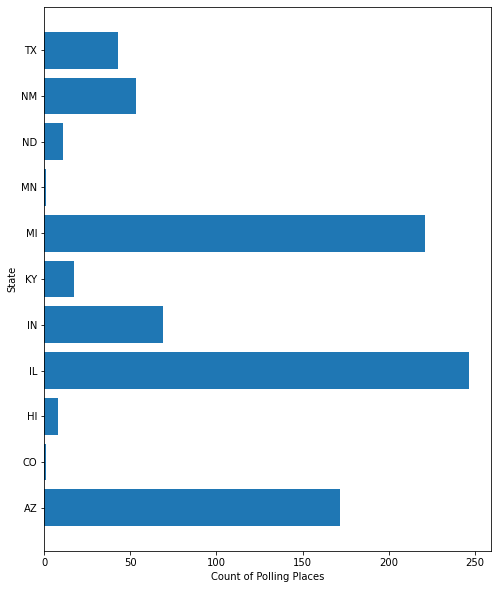

In [40]:
#Plot count of polling places
figure(figsize=(8, 10))
plt.barh(state_early.index,state_early.latitude)
plt.xlabel('Count of Polling Places')
plt.ylabel('State')

In [42]:
#The states with < 50 early voting places
state_early[state_early.latitude < 50]

,query_id,placekey,error,pollingHours,latitude,longitude,startDate,endDate,sources,address.locationName,address.line1,address.city,address.zip,notes,address.line2,name,voterServices
address.state,,,,,,,,,,,,,,,,,
CO,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
HI,8,8,3,8,8,8,8,8,8,8,8,8,8,8,1,0,0
KY,17,17,2,17,17,17,17,17,17,17,17,17,17,2,2,0,0
MN,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0
ND,11,11,0,0,11,11,0,0,11,11,11,11,11,0,0,0,0
TX,43,43,19,4,43,43,4,4,43,43,43,43,43,0,0,0,0


#### 2d) Let's look at coverage on a map

In [43]:
geo_df = geopandas.GeoDataFrame(
    early, geometry=geopandas.points_from_xy(early.longitude, early.latitude))

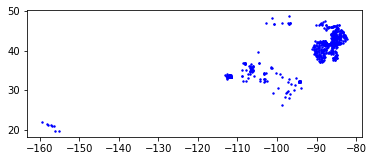

In [44]:
geo_df.plot(marker='o', color='blue', markersize=2)

### 3) Dropoff Voting Polling Places

In [45]:
dropoff.head()

,query_id,error,placekey,pollingHours,latitude,longitude,startDate,endDate,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,address.line2,address.line3,name,voterServices
0,0,Invalid address,@8m3-vqr-6ff,NaN,21.385785,-157.954228,NaN,NaN,"[{'name': 'Voting Information Project', 'offic...",Neal S. Blaisdell Park,98-319 Kamehameha Highway,Aiea,HI,96701,Open daily in accordance with park hours from ...,NaN,NaN,NaN,NaN
1,1,NaN,223@8m4-t78-yvz,NaN,21.387248,-157.999190,NaN,NaN,"[{'name': 'Voting Information Project', 'offic...",Bill Balfour Jr. Waipahu District Park,94-230 Paiwa Street,Waipahu,HI,96797,Open daily in accordance with park hours from ...,NaN,NaN,NaN,NaN
2,2,NaN,zzw-222@8m4-tb2-54v,NaN,21.344129,-157.869922,NaN,NaN,"[{'name': 'Voting Information Project', 'offic...",Kalihi Valley District Park,1911 Kamehameha IV Road,Honolulu,HI,96819,Open daily in accordance with park hours from ...,NaN,NaN,NaN,NaN
3,3,Invalid address,@8m3-vs7-j9z,NaN,21.468407,-158.003795,NaN,NaN,"[{'name': 'Voting Information Project', 'offic...",Mililani Park and Ride,95-1101 Ukuwai Street,Mililani,HI,96789,Open daily in accordance with park hours from ...,NaN,NaN,NaN,NaN
4,4,NaN,zzz-222@8m4-6tp-r8v,NaN,21.409124,-157.808878,NaN,NaN,"[{'name': 'Voting Information Project', 'offic...",Kaneohe District Park,45-660 Keaahala Road,Kaneohe,HI,96744,Open daily in accordance with park hours from ...,NaN,NaN,NaN,NaN


#### 3a) Which states are covered?

In [46]:
print(len(dropoff['address.state'].unique()))
dropoff['address.state'].unique()

35


array(['HI', 'IL', 'KS', 'NV', 'MN', 'SD', 'WA', 'AK', 'GA', 'OH', 'KY',
       'MI', 'CO', 'WY', 'ND', 'MT', 'PA', 'FL', 'CT', 'AZ', 'DC', 'DE',
       'ID', 'UT', 'VA', 'VT', 'RI', 'MA', 'ME', 'NJ', 'NM', 'MD', 'NY',
       'OR', 'CA'], dtype=object)

We see that dropoff voting locations are available for 35 states.

#### 3b) What % of each column is missing?

In [47]:
#What % of each column is missing?
dropoff.isna().sum()*100/len(dropoff.query_id)

query_id                  0.000000
error                    83.557789
placekey                  0.000000
pollingHours             12.361809
latitude                  0.683417
longitude                 0.683417
startDate                13.520938
endDate                  13.520938
sources                   0.000000
address.locationName      0.000000
address.line1             0.000000
address.city              0.000000
address.state             0.000000
address.zip               0.469012
notes                    58.331658
address.line2            96.730318
address.line3            99.973199
name                    100.000000
voterServices            77.393635
dtype: float64

Latitude and longitude are again only missing for < 1% of dropoff voting locations. Start date and end date are slightly less reliable and missing for ~13% of the dropoff voting locations. The address locations name, city, state, and zip code are present for all droppoff voting locations.

#### 3c) What states have less early voting representation?

In [48]:
state_dropoff = dropoff.groupby('address.state').count()

Text(0, 0.5, 'State')

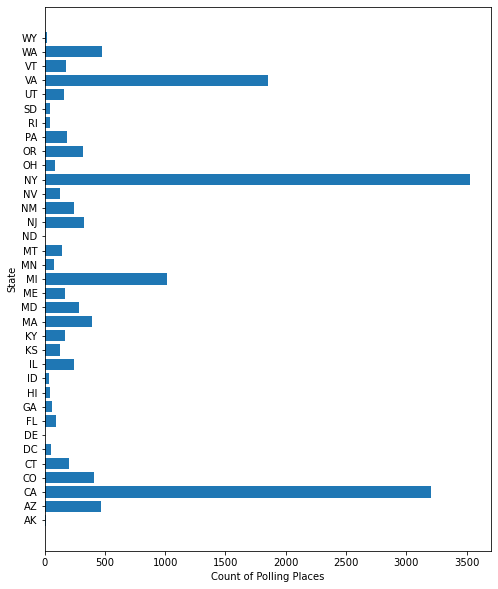

In [49]:
#Plot count of polling places
figure(figsize=(8, 10))
plt.barh(state_dropoff.index,state_dropoff.latitude)
plt.xlabel('Count of Polling Places')
plt.ylabel('State')

In [52]:
#The states with < 50 early voting places
state_dropoff[state_dropoff.latitude < 100]

,query_id,error,placekey,pollingHours,latitude,longitude,startDate,endDate,sources,address.locationName,address.line1,address.city,address.zip,notes,address.line2,address.line3,name,voterServices
address.state,,,,,,,,,,,,,,,,,,
AK,11,0,11,11,11,11,11,11,11,11,11,11,11,1,0,0,0,0
DC,55,1,55,55,55,55,55,55,55,55,55,55,55,4,0,0,0,0
DE,7,0,7,7,7,7,7,7,7,7,7,7,7,6,2,0,0,0
FL,98,3,98,96,97,97,98,98,98,98,98,98,98,88,23,0,0,0
GA,63,10,63,63,62,62,63,63,63,63,63,63,63,0,2,0,0,0
HI,47,17,47,37,47,47,37,37,47,47,47,47,47,47,1,0,0,0
ID,37,1,37,37,37,37,37,37,37,37,37,37,37,23,5,0,0,0
MN,77,1,77,77,77,77,77,77,77,77,77,77,77,50,6,0,0,0
ND,8,4,8,8,7,7,8,8,8,8,8,8,8,7,0,0,0,0


#### 3d) Let's look at coverage on a map

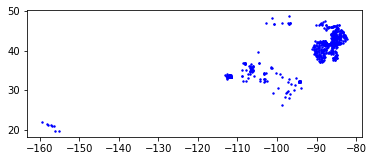

In [53]:
geo_df.plot(marker='o', color='blue', markersize=2)